In [9]:
import sympy as sym
sym.init_printing() 
# for LaTeX formatted output
import scipy as sp
import matplotlib as mpl
# As of July 2017 Bucknell computers use v. 2.x 
import matplotlib.pyplot as plt
# Following is an Ipython magic command that puts figures in the  notebook.
# For figures in separate windows, comment out following line and uncomment
# the next line
# Must come before defaults are changed.
%matplotlib notebook
#%matplotlib
# As of Aug. 2017 reverting to 1.x defaults.
# In 2.x text.ustex requires dvipng, texlive-latex-extra, and texlive-fonts-recommended, 
# which don't seem to be universal
# See https://stackoverflow.com/questions/38906356/error-running-matplotlib-in-latex-type1cm?
mpl.style.use('classic')
# M.L. modifications of matplotlib defaults using syntax of v.2.0 
# More info at http://matplotlib.org/2.0.0/users/deflt_style_changes.html
# Changes can also be put in matplotlibrc file, or effected using mpl.rcParams[]
plt.rc('figure',figsize = (6,4.5))            
# Reduces overall size of figures
plt.rc('axes',labelsize=16, 
titlesize=14)
plt.rc('figure',autolayout = True)             
# Adjusts supblot parameters 

In [10]:
x =sym.symbols('x') 
f,g =sym.symbols('f g',cls=sym.Function)

In [11]:
f(x)

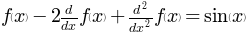

In [12]:
diffeq =sym.Eq(f(x).diff(x,x)-2*f(x).diff(x)+f(x),sym.sin(x))
diffeq

In [13]:
soln =sym.dsolve(diffeq,f(x))
soln

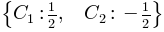

In [14]:
constants =sym.solve([soln.rhs.subs(x,0)-1,soln.rhs.diff(x,1).subs(x,0)-0])
constants

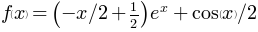

In [15]:
C1,C2 =sym.symbols('C1,C2')
soln =soln.subs(constants)
soln

<IPython.core.display.Javascript object>


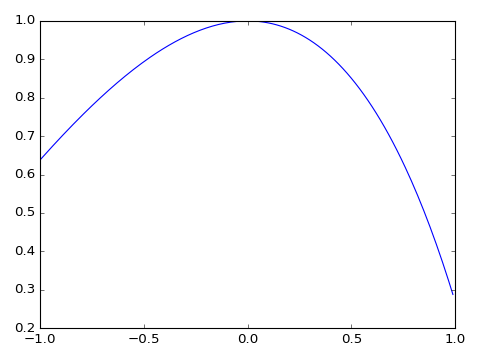

In [17]:
func = sym.lambdify(x,soln.rhs,'numpy')
xx =sp.arange(-1,1,.01)  
# name = xx so it won't collide with symbol x
y =func(xx)
plt.figure(1)
plt.plot(xx,y);
